<a href="https://colab.research.google.com/github/jaewoo-cho/jaewoo/blob/master/42_%EC%8B%A0%EA%B2%BD%EB%A7%9D_%EB%AA%A8%EB%8D%B8_%ED%9B%88%EB%A0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 신경망 모델 훈련

In [ ]:
# ● 사이킷런의 머신러닝 알고리즘 :
#   - 모델의 구조는 어느정도 '고정'
#   - 좋은 성능을 위해 '매개변수를 조정'하고 훈련하는 과정 반복
# ● 딥러닝 :
#   - 모델의 구조를 '직접' 만든다 (층을 추가, 뉴런의 개수, 활성화 함수 설정 등...)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import tensorflow as tf
from tensorflow import keras

import random
def set_seed(seed = 42):
  tf.keras.utils.set_random_seed(seed)
  tf.config.experimental.enable_op_determinism()

set_seed(42)


# 데이터 준비

In [ ]:
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# History 객체

In [ ]:
# fit() 메소드의 리턴값 => History 객체
# History 객체에는 훈련과정에서 계산한 지표, 즉 loss 와 accuracy 값이 저장되어 있다.

In [ ]:
# 모델 만들기. 함수로 정의
# a_layer= 레이어를 받아서 hidden layer 추가
def model_fn(a_layer=None):
  set_seed(42)
  model = keras.Sequential()
  model.add(keras.layers.Input(shape=(28,28)))
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(100, activation='relu'))
  a_layer and model.add(a_layer) # 앞의 hidden layer 뒤에 또하나의 층을 추가
  model.add(keras.layers.Dense(10, activation='softmax'))
  return model

In [ ]:
model = model_fn()
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# ↓ verbose= 는 훈련과정 출력을 조절
#   1 : (기본값) 이전에 보았던 것처럼 에포크마다 진행막대와 손실등의 지표를 출력
#   2 : 진행막대를 빼고 출력.
#   0 : 훈련과정을 나타내지 않기.

history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

In [ ]:
# history 에는 측정값이 담겨 있는 .histroy dict가 들어있다.
type(history.history)

dict

In [ ]:
history.history

{'accuracy': [0.8112499713897705,
  0.8585625290870667,
  0.8728541731834412,
  0.8809791803359985,
  0.8873124718666077],
 'loss': [0.5311373472213745,
  0.39031779766082764,
  0.3522854745388031,
  0.33061161637306213,
  0.31411638855934143]}

In [ ]:
history.history.keys()

# dict_keys(['loss', 'accuracy'])
# <- 'loss' 와 'accuray' 가 포함되어 있다.
# keras 는 epoch 마다 손실 계산한다.
# compile() 메소드에 metrics= 매개변수에 'accuracy' 를 추가했기 때문에
# history 속성에 포함되어 있는겁니다.

dict_keys(['accuracy', 'loss'])

In [ ]:
history.history['loss']

[0.5311373472213745,
 0.39031779766082764,
 0.3522854745388031,
 0.33061161637306213,
 0.31411638855934143]

In [ ]:
history.history['accuracy']

[0.8112499713897705,
 0.8585625290870667,
 0.8728541731834412,
 0.8809791803359985,
 0.8873124718666077]

# 손실곡선

## Training Loss (훈련손실)

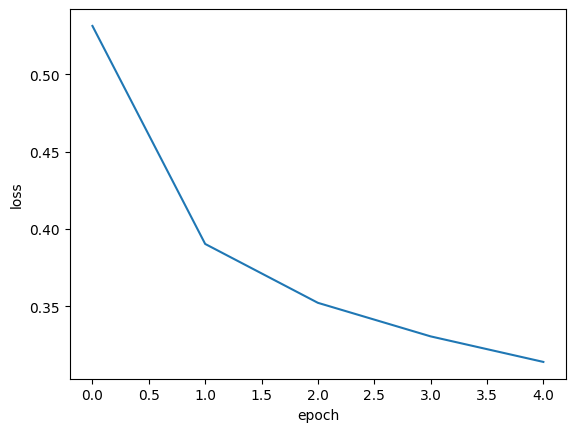

In [ ]:
# epoch 진행에 따른 loss 시각화
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

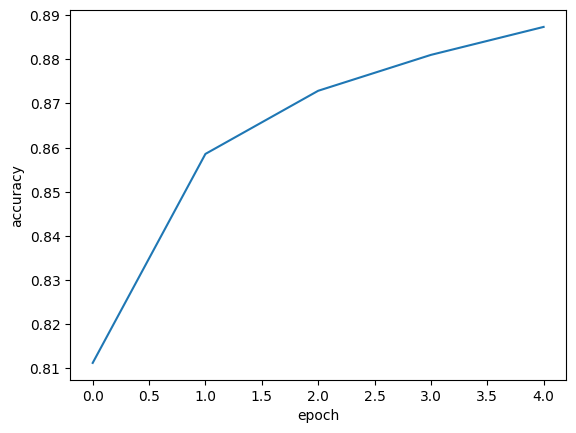

In [ ]:
# accuracy 출력
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [ ]:
# epoch를 더 늘려보자

In [ ]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=1)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7620 - loss: 0.6785
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8521 - loss: 0.4056
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8686 - loss: 0.3600
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8788 - loss: 0.3362
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8849 - loss: 0.3192
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8912 - loss: 0.3038
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8958 - loss: 0.2940
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9001 - loss: 0.2833
Epoch 9/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9042 - loss: 0.2739
Epoch 10/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9082 - loss: 0.2671
Epoch 11/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9109 - loss: 0.2594
Epoch 12/20
1500/1500 ━━━━━━

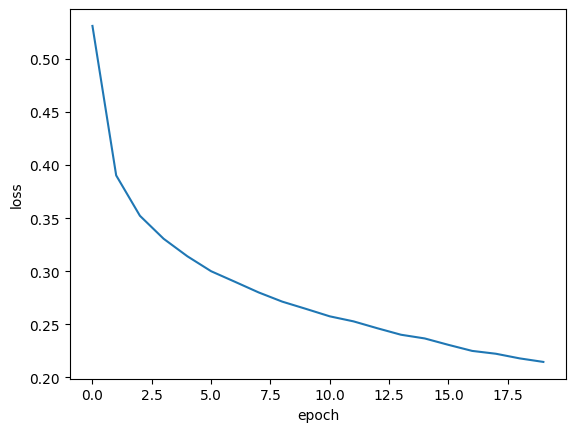

In [ ]:
# epoch 진행에 따른 loss 시각화
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
# 이는 training loss 다
# 검증손실을 확인해보자

## Validation Loss(검증 손실)

In [ ]:
# 검증데이터에 대한 점수 필요
# overfit / underfit 여부 확인

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2024/04/1-02-1-scaled.jpg)


In [ ]:
# 정확도와 loss 값이 언제나 반비례는 아니다
# 신경망 모델에서 최적화 대상은 정확도가 아니라 손실함수

### validation_data= 매개변수 사용
fit() 의 매개변수


In [ ]:
# 에포크마다 검증 손실을 계산하기 위해 keras 모델의 fit() 메소드에 검증데이터를 전달할수 있다
#  validation_data= 매개변수에 검증에 사용할 입력과 타깃 값을 튜플로 만들어 전달한다.

model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7620 - loss: 0.6785 - val_accuracy: 0.8457 - val_loss: 0.4327
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8521 - loss: 0.4056 - val_accuracy: 0.8625 - val_loss: 0.3899
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8686 - loss: 0.3600 - val_accuracy: 0.8660 - val_loss: 0.3802
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8788 - loss: 0.3362 - val_accuracy: 0.8689 - val_loss: 0.3779
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8849 - loss: 0.3192 - val_accuracy: 0.8718 - val_loss: 0.3665
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8912 - loss: 0.3038 - val_accuracy: 0.8691 - val_loss: 0.3828
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8958 - loss: 0.2940 - val_accuracy: 0.8642 - val_loss: 0.4061
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9001 - loss: 0.2833

In [ ]:
# history 에는 검증세트에 대한 손실 val_loss 와 val_accuacy가 들어있다
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

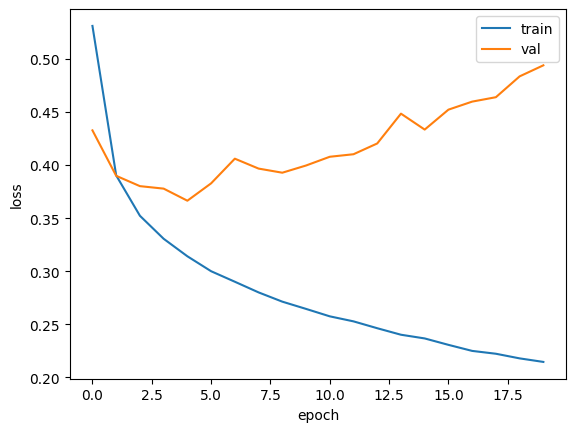

In [ ]:
# overfit / underfit 여부를 확인하기 위해 시각화

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
"""
↑ 초기에 검증 손실이 감소하다가 다섯번째 에포크 만에 다시 '상승'하기 시작한다.
    (상승! 치솟고 있는점에 주목)
  훈련손실은 꾸준이 감소하고 있기 때문에 과대적합 모델이 만들어지기 시작하는 거다.
  검증 손실이 상승하는 시점을 가능한 뒤로 늦출수만 있다면
  검증 세트에 대한 손실이 줄어들 뿐 아니라 검증 세트에 대한 정확도도 증가할 것이다.
"""
None


In [ ]:
# overfit 을 막기 위한 '규제(regularization)'

# 일단은 'optimizer 의 파라미터'를 조정해서 overfit 막을수 있나 보자.

# RMSprop 대신 다른 옵티마이저 선택한다면 Adam 을 써보자.
#   Adam 은 'adaptive learning rate' 사용


In [ ]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7630 - loss: 0.6753 - val_accuracy: 0.8465 - val_loss: 0.4280
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8546 - loss: 0.4058 - val_accuracy: 0.8588 - val_loss: 0.3901
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8692 - loss: 0.3597 - val_accuracy: 0.8633 - val_loss: 0.3692
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8811 - loss: 0.3282 - val_accuracy: 0.8709 - val_loss: 0.3582
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8879 - loss: 0.3062 - val_accuracy: 0.8715 - val_loss: 0.3630
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8932 - loss: 0.2893 - val_accuracy: 0.8721 - val_loss: 0.3629
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8988 - loss: 0.2751 - val_accuracy: 0.8788 - val_loss: 0.3484
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9024 - loss: 0.2629

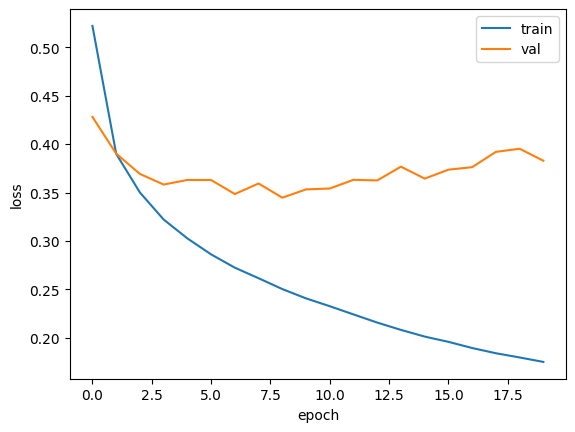

In [ ]:
plt.plot(history.history['loss'])  #  training loss
plt.plot(history.history['val_loss']) # validataion loss
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# Dropout 드롭아웃

- 신경망에서 사용되는 대표적인 규제 (regularization)
- 제프리 힌터 (Geoffrey Hinton) 이 소개
- '훈련과정' 에서 층에 있는 일부 뉴런을 랜덤하게 꺼서 (즉 뉴런의 출력을 0으로 만들어)
과대 적합을 억제

![](https://www.researchgate.net/publication/340700034/figure/fig3/AS:881306405724163@1587131229956/Dropout-Strategy-a-A-standard-neural-network-b-Applying-dropout-to-the-neural.ppm)


In [ ]:
#  '훈련과정' 에서 층에 있는 일부 뉴런을 랜덤하게 꺼서 (즉 뉴런의 출력을 0으로 만들어)
# 과대 적합을 억제

# 왜 과대적합을 막을까?
#  - 특정 뉴런에 과대하게 의존하는 것을 줄여, 신경망이 더 안정적인 예측을 만들수 있다.
#  - 마치 여러개의 신경망을 '앙상블' 하는 것처럼 동작한다.  이또한 과대적합을 막아주는 좋은 기법.

**tf.keras.layers.Dropout**

https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout

```python
tf.keras.layers.Dropout(
    rate,  # 0.0 ~ 1.0
    noise_shape=None,
    seed=None,
    **kwargs
)
```


In [ ]:
# keras 의 드롭아웃은 keras.layers.Dropout 클래스로 제공
# 어떤 층의 뒤에 Dropout 을 두어 이 층의 출력을 랜덤하게 0 으로 만들어 준다.
# Dropout 은 '층' 처럼 사용되지만 훈련되는 모델 파라미터는 없습니다.

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 238,532 (931.77 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 159,022 (621.18 KB)

In [ ]:
model = model_fn(keras.layers.Dropout(rate = 0.3)) # 훈련중에 30% 정도 dropout 하기
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Dropout
#   - 모델 파라미터 없다!
#   - 입력과 출력의 크기 같다.
#     - 출력을 0으로 만들뿐 출력배열의 크기는 동일.
#   - '훈련' 할때만 동작.
#   - '평가' , '예측' 할때는 동작하지 않는다.

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7345 - loss: 0.7648 - val_accuracy: 0.8472 - val_loss: 0.4312
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8378 - loss: 0.4531 - val_accuracy: 0.8620 - val_loss: 0.3793
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8523 - loss: 0.4129 - val_accuracy: 0.8674 - val_loss: 0.3645
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8572 - loss: 0.3894 - val_accuracy: 0.8698 - val_loss: 0.3529
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8634 - loss: 0.3744 - val_accuracy: 0.8758 - val_loss: 0.3414
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8704 - loss: 0.3555 - val_accuracy: 0.8751 - val_loss: 0.3445
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8724 - loss: 0.3499 - val_accuracy: 0.8746 - val_loss: 0.3422
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8760 - loss: 0.3391

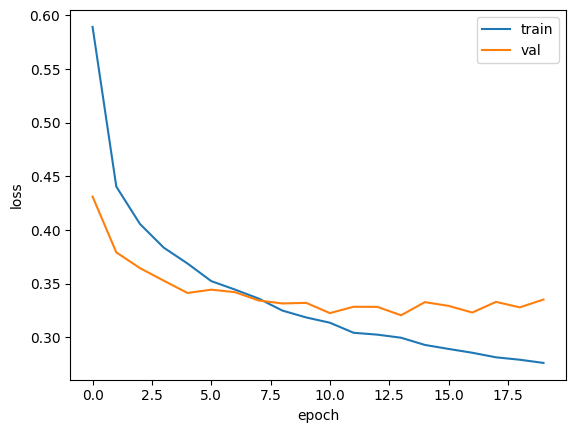

In [ ]:
plt.plot(history.history['loss'])  #  training loss
plt.plot(history.history['val_loss']) # validataion loss
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
# ↑ overfit 이 확실히 줄었다.
# 20번 epoch 동안 훈련하면서 overfit 되긴 했지만
# 12번정도의 epoch 로 설정해서 다시 훈련하면 될거 같다!

# 최적의 epoch 어캐 알아낼건데?

# Keras 모델 저장과 복원
- Keras 모델의 구성요소
  - 모델의 구조 (레이어, 연결방법등..)
  - weight 값 (모델의 상태)
  - 옵티마이저 (모델을 compile 하여 정의됨)
- Keras 는 이 요소들을 한번에 모두 저장하거나, 혹은 일부만 저장할수 있다


- 참조: https://www.tensorflow.org/guide/keras/save_and_serialize?hl=ko


In [ ]:
# epoch 횟수 12번으로 지정하고 모델 훈련. 저장
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=12,
                    validation_data=(val_scaled, val_target))

Epoch 1/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7345 - loss: 0.7648 - val_accuracy: 0.8472 - val_loss: 0.4312
Epoch 2/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8378 - loss: 0.4531 - val_accuracy: 0.8620 - val_loss: 0.3793
Epoch 3/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8523 - loss: 0.4129 - val_accuracy: 0.8674 - val_loss: 0.3645
Epoch 4/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8572 - loss: 0.3894 - val_accuracy: 0.8698 - val_loss: 0.3529
Epoch 5/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8634 - loss: 0.3744 - val_accuracy: 0.8758 - val_loss: 0.3414
Epoch 6/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8704 - loss: 0.3555 - val_accuracy: 0.8751 - val_loss: 0.3445
Epoch 7/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8724 - loss: 0.3499 - val_accuracy: 0.8746 - val_loss: 0.3422
Epoch 8/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8760 - loss: 0.3391 -

In [ ]:
# weight 만 저장하고
# 1. 훈련하지 않은 새로운 모델만들고 저장한 weight (모델 파라미터)를 읽어와서 사용해보기

# 2. 새로운 모델을 만들어 사용해보기

## save_weights(), load_weights()
- save_weights()
  - 훈련된 모델의 weight 들을 저장
  - 저장포맷 2가지
    1. Tensorflow 체크포인트 포맷 (디폴트)
    1. HDF5 포맷
      - save_format='h5'
      - 혹은 *.h5 또는 *.hdf5 로 끝나는 파일로 저장
- load_weight()



In [ ]:
model.save_weights('model.weights.h5') # 파일명은 weights.h5로 끝나야함

In [ ]:
#  load_weights() 를 사용하여 복원하려면
#  save_weights() 로 저장했던 모델과 정확히 같은 구조를 가져야 한다
#  그렇지 않으면 에러!

In [ ]:
new_model = model_fn(keras.layers.Dropout(0.3))
new_model.load_weights('model.weights.h5')

## predict()

In [ ]:
# 이 모델의 검증 정확도를 확인해볼겁니다.

# keras 의 predict() 는 사이킷럿과 달리 샘플마다 10개의 클래스에 대한 확률을 리턴한다
#  ↑ FashionMNIST 는 다중 분류 문제이기 때문이다.   (이진 분류 문제라면 양성 클래스에 대한 확률 하나만 반환한다.)

# keras 에도 '확률' 대신 '클래스' 로 예측해주는 메소드가 있긴 하다 -> predict_classes()
# 그러나 predict_classes() 는 deprecated 되었고, keras 공식에도 predict() 를 권장하고 있다.

# 검증세트의 샘플 개수는 12,000개 이기 때문에
# predict는 (12000,10) 크기의 배열 리턴한다
# 각 10개의 확률중에서 가장 큰 값의 인덱스를 골라 타겟 레이블과 비교하여 정확도 계산



In [ ]:
val_scaled.shape

(12000, 28, 28)

In [ ]:
# 잠깐!]  왜 evaluate() 를 사용하지 않나요?
#  모델 파라미터를 읽은 후 evaluate() 메소드를 사용하여 정확도를 출력할 수도 있습니다.
#  하지만! evaluate() 메소드는 손실을 계산하기 위해 반드시 먼저 compile() 메소드를 실행해야 합니다.
#  여기에서는 새로운 데이터에 대한 정확도만 계산하면 되는 상황이라 가정합니다.

In [ ]:
val_labels = np.argmax(new_model.predict(val_scaled), axis=-1)
print(val_labels.shape)
val_labels

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
(12000,)


array([8, 8, 7, ..., 8, 8, 0])

In [ ]:
# argmax() 로 고른 인덱스(val_labels) 와 타겟(val_target) 을 비교

np.mean(val_labels == val_target) # 정확도

np.float64(0.8811666666666667)

In [ ]:
"""
Epoch 12/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8851 - loss: 0.3080 - val_accuracy: 0.8812 - val_loss: 0.3286
마지막 epoch 시 val_accuracy 와 동일한 값
"""
None

## save(), load_model()
- save()
  - 저장하는 것들
    - 모델구조
    - 훈련된 모델파라미터
    - 모델의 컴파일 정보
    - 옵티마이저와 그 상태
  - 저장 형식 두가지
    1. TensorFlow SavedModel 포맷 (기본값)
    1. Keras H5 포맷
      - save_format='h5'를 save()로 전달
      - 혹은 .h5 또는 .keras로 끝나는 파일명을 save()로 전달
- load_model()



In [ ]:
model.save('model-whole.keras')

In [ ]:
new_model = None
new_model = keras.models.load_model('model-whole.keras')

new_model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8828 - loss: 0.3251


[0.32855424284935, 0.8811666369438171]

In [ ]:
# predict(데이터) => 예측값
# evaluate(데이터, 타켓) => 점수

# evaluate() 는 손실을 계산하기 위해 반드시 compile() 메소드를 실행해야 한다.
# save_model() 이 저장하는 모델은 모델구조와 옵티마이저 상태까지 저장
# load_model() 은 모델 + 파라미터 가져온다.  이때 모델구조와 옵티마이저 상태까지 모두 복원.

# Callback 콜백
keras.callbacks

In [ ]:
# 콜백(callback) 은 '훈련 과정 중간' 에 어떤 작업을 수행할 수 있게 하는 객체
# fit() 의 callbacks= 매개변수로 전달하여 사용 (list)

## ModelCheckpoint 콜백

**tf.keras.callbacks.ModelCheckpoint**

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint

```python
tf.keras.callbacks.ModelCheckpoint(
    filepath,  # 모델 저장 경로
    monitor='val_loss',
    verbose=0,
    save_best_only=False,  # True 이면 가장 낮은 검증 점수를 만드는 모델을 저장
    save_weights_only=False,
    mode='auto',
    save_freq='epoch',
    initial_value_threshold=None
)
```

In [ ]:
# ModelCheckPoint 콜백은 기본적으로 에포크마다 모델을 저장한다
#  save_best_only = True  지정하면 가장 낮은 검증 점수를 만드는 모델만 저장할 수 있다.

# epochs=20

model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras', save_best_only=True)

history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb])  # [...] 형태로 콜백객체 전달

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7292 - loss: 0.7672 - val_accuracy: 0.8457 - val_loss: 0.4244
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8382 - loss: 0.4491 - val_accuracy: 0.8590 - val_loss: 0.3870
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8519 - loss: 0.4135 - val_accuracy: 0.8659 - val_loss: 0.3668
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8606 - loss: 0.3869 - val_accuracy: 0.8708 - val_loss: 0.3490
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8651 - loss: 0.3734 - val_accuracy: 0.8748 - val_loss: 0.3396
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8698 - loss: 0.3565 - val_accuracy: 0.8733 - val_loss: 0.3405
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8751 - loss: 0.3453 - val_accuracy: 0.8727 - val_loss: 0.3431
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8779 - loss: 0.332

In [ ]:
# 위 저장된 모델을 load_model() 함수로 읽어서 평가
model = keras.models.load_model('best-model.keras')
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8887 - loss: 0.3154


[0.3158051073551178, 0.887666642665863]

## Early stopping(조기종료)

**tf.keras.callbacks.EarlyStopping**

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

```python
tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=0,  
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)
```

In [ ]:
# ↑ModelCheckpoint 콜백을 통해 가장 낮은 검증점수의 모델을 자동 저장하긴 했으나!
# 여전에 20번의 에포크는 수행했다.

# 검증점수가 상승하기 시작하면 overfit 이 커지기 때문에
# 훈련을 계속할 필요가 없으므로!  훈련을 중지하여 컴퓨터의 시간과 자원 절약 가능.

# overfit 발생되기 전에 조기종료(early stopping)
# 조기종료 또한 규제(refularization) 의 한가지 방법.


In [ ]:
# patience=
#    검증점수가 향상되지 않더라도 좀더 참고 수행할 에포크 횟수 지정.

# restore_best_weights=
#     True 로 지정하면 가장 낮은 검증 손실을 낸 파라미터로 되돌린다.


In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])  # [...] 형태로 콜백객체 전달

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7345 - loss: 0.7648 - val_accuracy: 0.8472 - val_loss: 0.4312
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8378 - loss: 0.4531 - val_accuracy: 0.8620 - val_loss: 0.3793
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8523 - loss: 0.4129 - val_accuracy: 0.8674 - val_loss: 0.3645
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8572 - loss: 0.3894 - val_accuracy: 0.8698 - val_loss: 0.3529
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8634 - loss: 0.3744 - val_accuracy: 0.8758 - val_loss: 0.3414
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8704 - loss: 0.3555 - val_accuracy: 0.8751 - val_loss: 0.3445
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8724 - loss: 0.3499 - val_accuracy: 0.8746 - val_loss: 0.3422


In [ ]:
# 몇번째 epoch 에서 훈련이 중지 되었나?
early_stopping_cb.stopped_epoch
# 이 epoch 값은 0-base 다
# 6 <- 7번째 epoch 에서 종료
# 따라서 최상의 모델은 5번째 epoch 에서 학습한 weight 값 (patience=2 였기 때문)

6

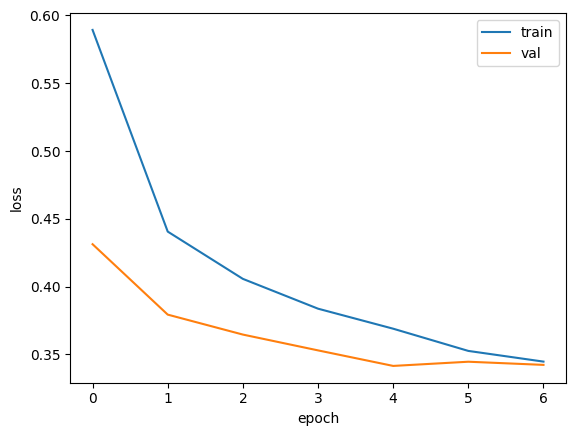

In [ ]:
plt.plot(history.history['loss'])  #  training loss
plt.plot(history.history['val_loss']) # validataion loss
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
# 조기종료로 얻은 최상의 모델을 사용해 성능 확인
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8798 - loss: 0.3356


[0.34139978885650635, 0.8757500052452087]

# 최상의 신경망 모델 얻기 (문제해결과정)
인공신경망 모델을 훈련하기 위한 다양한 도구를 학습했다

1. fit() 의 리턴값 을 사용해 훈련세트와 검증세트에 대한 손실을 그래프로 그릴 수 있습니다.  이를 위해 fit() 메소드는 훈련세트 뿐만 아니라 검증세트를 전달할수 있는 매개변수를 제공합니다.

1. DropOut : 과대적합을 막기 위한 인공신경망의 규제방법
  - 학습시 일부 뉴런의 출력을 랜덤하게 끔
  - 일부 뉴런에 과하게 의존하는 것을 막고
  - 마치 많은 신경망이 앙상블 하는 듯한 효과
1. 모델, 혹은 모델 파라미터 저장하고 복원하기
1. 콜백을 사용하면 과대 적합 되기전에 에포크를 종료. 최상의 모델 유지할수 있다

